In [1]:
import numpy as np
import pandas as pd

scale_series = [2, 3, 4, 5, 6]

folder_name = 'slide_seq_dna_rna_series'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
genes = pd.read_csv(f'result/{folder_name}/x2/rowData.csv')['Gene'].tolist()
print(genes)

['PC1', 'PC2', 'Hmga2', 'Tm4sf1', 'Aqp5']


In [3]:
def linear_normalize(array):
    array_n = array.copy()
    for i in range(array.shape[-1]):
        min_ = np.min(array[:, i])
        max_ = np.max(array[:, i])
        array_n[:, i] = (array[:, i] - min_) / (max_ - min_)
    return array_n


def linear_normalize_df(dataframe):
    """
    f: M -> M/normalize
    Args:
        dataframe: a pandas DataFrame, count matrix with dim of [cell, gene]
    Returns: linear normalized matrix
    """
    keys = dataframe.keys()
    array = dataframe.values
#     new_array = array.copy()
#     for i in range(array.shape[1]):
#         new_array[:,i] = linear_normalize(array[:,i])
    new_array = linear_normalize(array)
    new_dataframe = pd.DataFrame(new_array, columns=keys)
    return new_dataframe
data_norm = linear_normalize_df(data)
data_norm.to_csv(f'result/{folder_name}/x2/reordered_count_norm.csv')

# Supp Fig 7 (a-c)

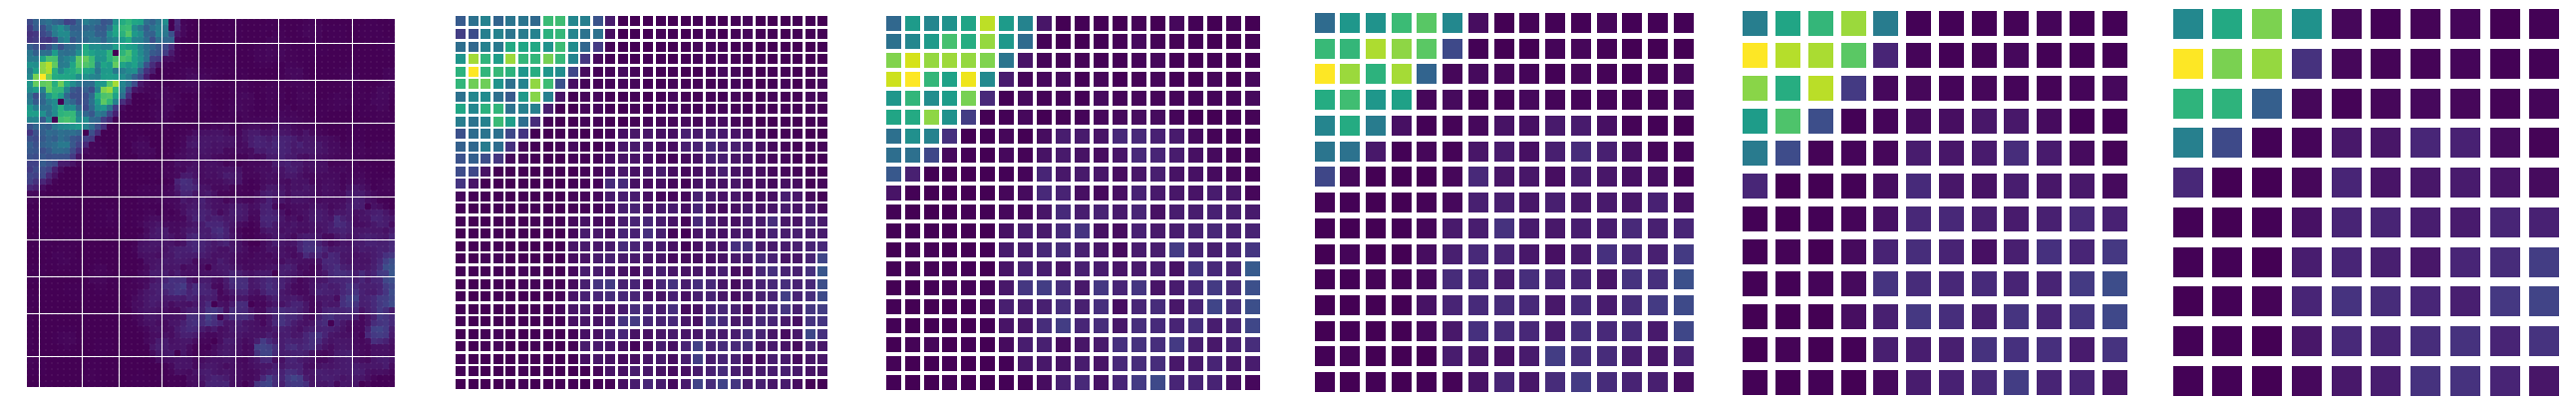

In [4]:
cmp = 'viridis'
def min_max_norm(array):
    return (array - np.min(array))/(np.max(array) - np.min(array))

def min_max_norm_t(array, min_=0., max_=1.0):
    norm_array = min_max_norm(array)
    return ((norm_array - min_) + np.abs((norm_array - min_)))/2 - ((norm_array - max_) + np.abs((norm_array - max_)))/2

f, axs = plt.subplots(nrows=1, ncols=6, figsize=(36, 6))

data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

size_ = 25
plt.axis("equal")
axs[0].scatter(row, col, s=size_, marker='s', c=min_max_norm_t(data[genes[2]].values), cmap=cmp)
plt.tight_layout()
axs[0].axis('off')
axs[0].axis("equal")

plt.axis("equal")
for i in range(5):
    data = pd.read_csv(f'result/{folder_name}/x{i+2}/count_merge.csv')
    position = pd.read_csv(f'result/{folder_name}/x{i+2}/colData_merge.csv')
    row = np.array(position['col'].tolist())
    col = np.array(position['row'].tolist())
    axs[i+1].axis("equal")
    axs[i+1].scatter(row, col, s=(5*(i+2))**2, marker='s', 
                      c=min_max_norm_t(data[genes[2]].values), 
                      linewidth=0, cmap=cmp)
    plt.tight_layout()
    axs[i+1].axis('off')
    
plt.savefig(f'../paper/NNfig/Fig4/supp/scale_compare_{genes[2]}.pdf')
plt.show()

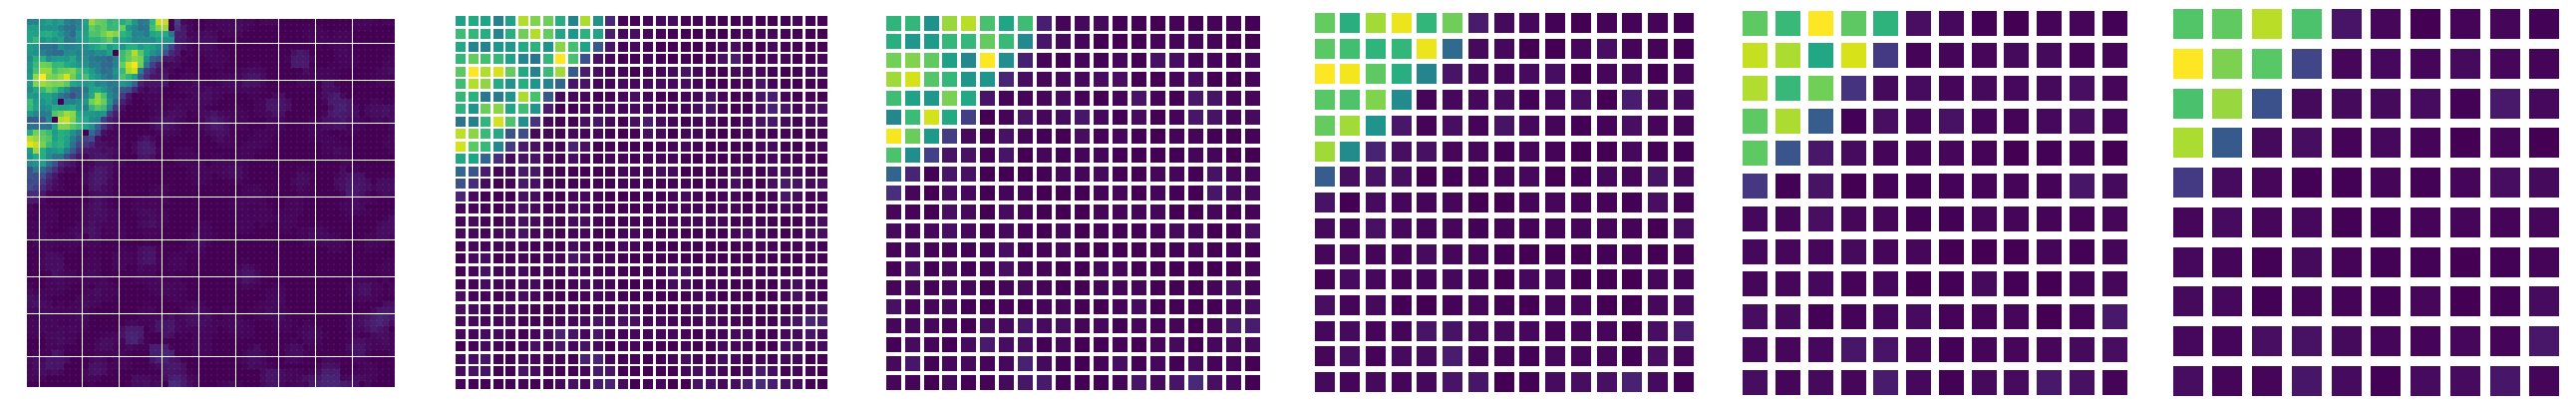

In [5]:
f, axs = plt.subplots(nrows=1, ncols=6, figsize=(36, 6))

data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

size_ = 25
plt.axis("equal")
axs[0].scatter(row, col, s=size_, marker='s', c=min_max_norm_t(data[genes[3]].values), cmap=cmp)
plt.tight_layout()
axs[0].axis('off')
axs[0].axis("equal")

plt.axis("equal")
for i in range(5):
    data = pd.read_csv(f'result/{folder_name}/x{i+2}/count_merge.csv')
    position = pd.read_csv(f'result/{folder_name}/x{i+2}/colData_merge.csv')
    row = np.array(position['col'].tolist())
    col = np.array(position['row'].tolist())
    axs[i+1].axis("equal")
    axs[i+1].scatter(row, col, s=(5*(i+2))**2, marker='s', 
                      c=min_max_norm_t(data[genes[3]].values), 
                      linewidth=0, cmap=cmp)
    plt.tight_layout()
    axs[i+1].axis('off')
    
plt.savefig(f'../paper/NNfig/Fig4/supp/scale_compare_{genes[3]}.pdf')
plt.show()

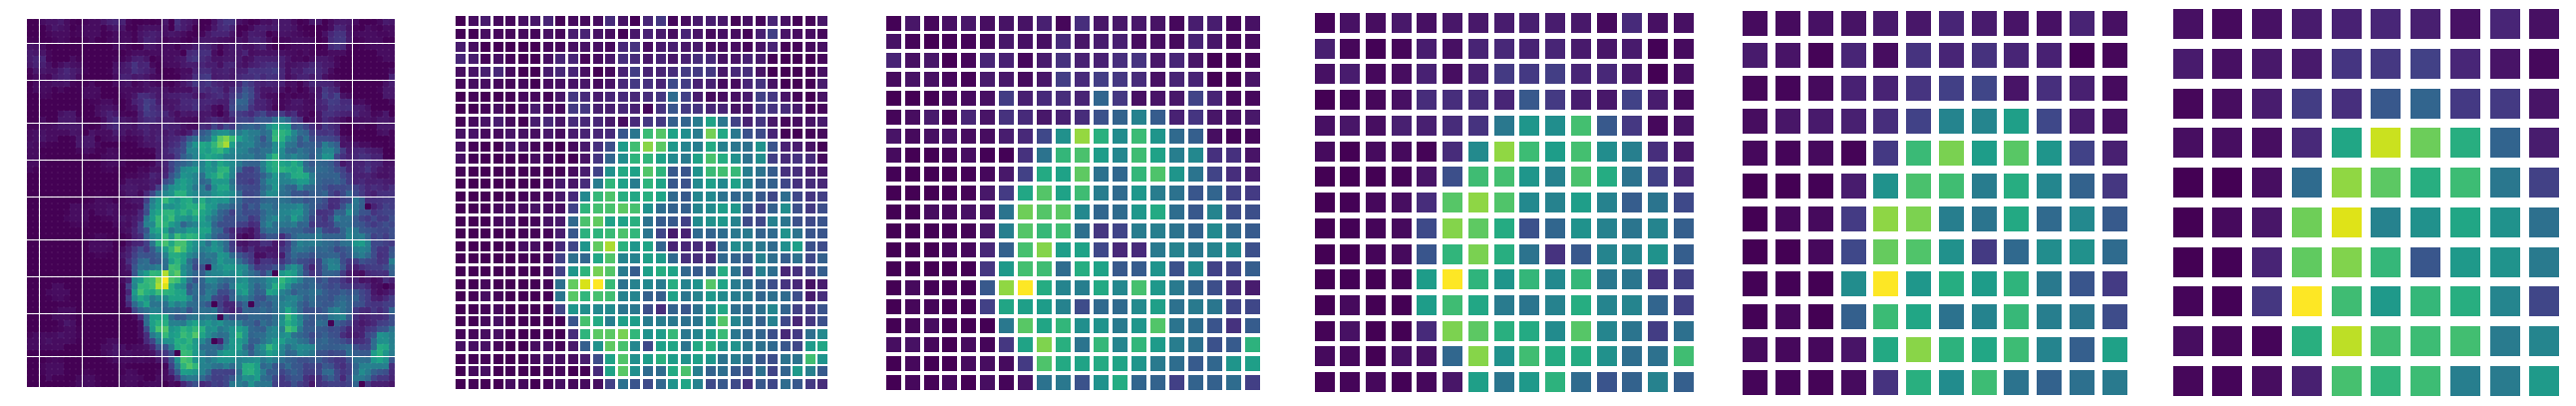

In [6]:
f, axs = plt.subplots(nrows=1, ncols=6, figsize=(36, 6))

data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

size_ = 25
plt.axis("equal")
axs[0].scatter(row, col, s=size_, marker='s', c=min_max_norm_t(data[genes[4]].values), cmap=cmp)
plt.tight_layout()
axs[0].axis('off')
axs[0].axis("equal")

plt.axis("equal")
for i in range(5):
    data = pd.read_csv(f'result/{folder_name}/x{i+2}/count_merge.csv')
    position = pd.read_csv(f'result/{folder_name}/x{i+2}/colData_merge.csv')
    row = np.array(position['col'].tolist())
    col = np.array(position['row'].tolist())
    axs[i+1].axis("equal")
    axs[i+1].scatter(row, col, s=(5*(i+2))**2, marker='s', 
                      c=min_max_norm_t(data[genes[4]].values), 
                      linewidth=0, cmap=cmp)
    plt.tight_layout()
    axs[i+1].axis('off')
    
plt.savefig(f'../paper/NNfig/Fig4/supp/scale_compare_{genes[4]}.pdf')
plt.show()

In [7]:
from postprocess import Numpy2Image as n2i
from postprocess import Result2Csv as r2c
import numpy as np
import pandas as pd

# exp_group = 4
exp_group = 5
for s in scale_series:
    scale = s
    project_name = f'{folder_name}/x{scale}'
    # exp_name = f'svae_slide_rnx{scale}_g{exp_group}_n'
    exp_name = f'svae_slide_rnx{scale}_nn{exp_group}_n'
    feature_name = ['Hmga2', 'Tm4sf1', 'Aqp5']

    grid = scale**2

    fea = np.load(f'result/{folder_name}/{exp_name}/infer_subspot.npy')
    mean_fea = np.zeros((fea.shape[0]//grid, fea.shape[1]))
    spot_num = fea.shape[0]//grid
    for i in range(spot_num):
        fea_sub = fea[i * grid :(i + 1) * grid]
        mean_fea[i] = np.mean(fea_sub, axis=0)

    df = pd.DataFrame(fea, columns=feature_name)
    df.to_csv(f'result/{folder_name}/norm/RNA/x{s}/ours.csv', index=None)

In [8]:
data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())
data_name = ['interpolation_linear', 'gp_4', 'g2p_lrm', 'g2p_gp', 'g2p_mlp_128', 'joint_mlp_128', 'ours']
size_ = 49

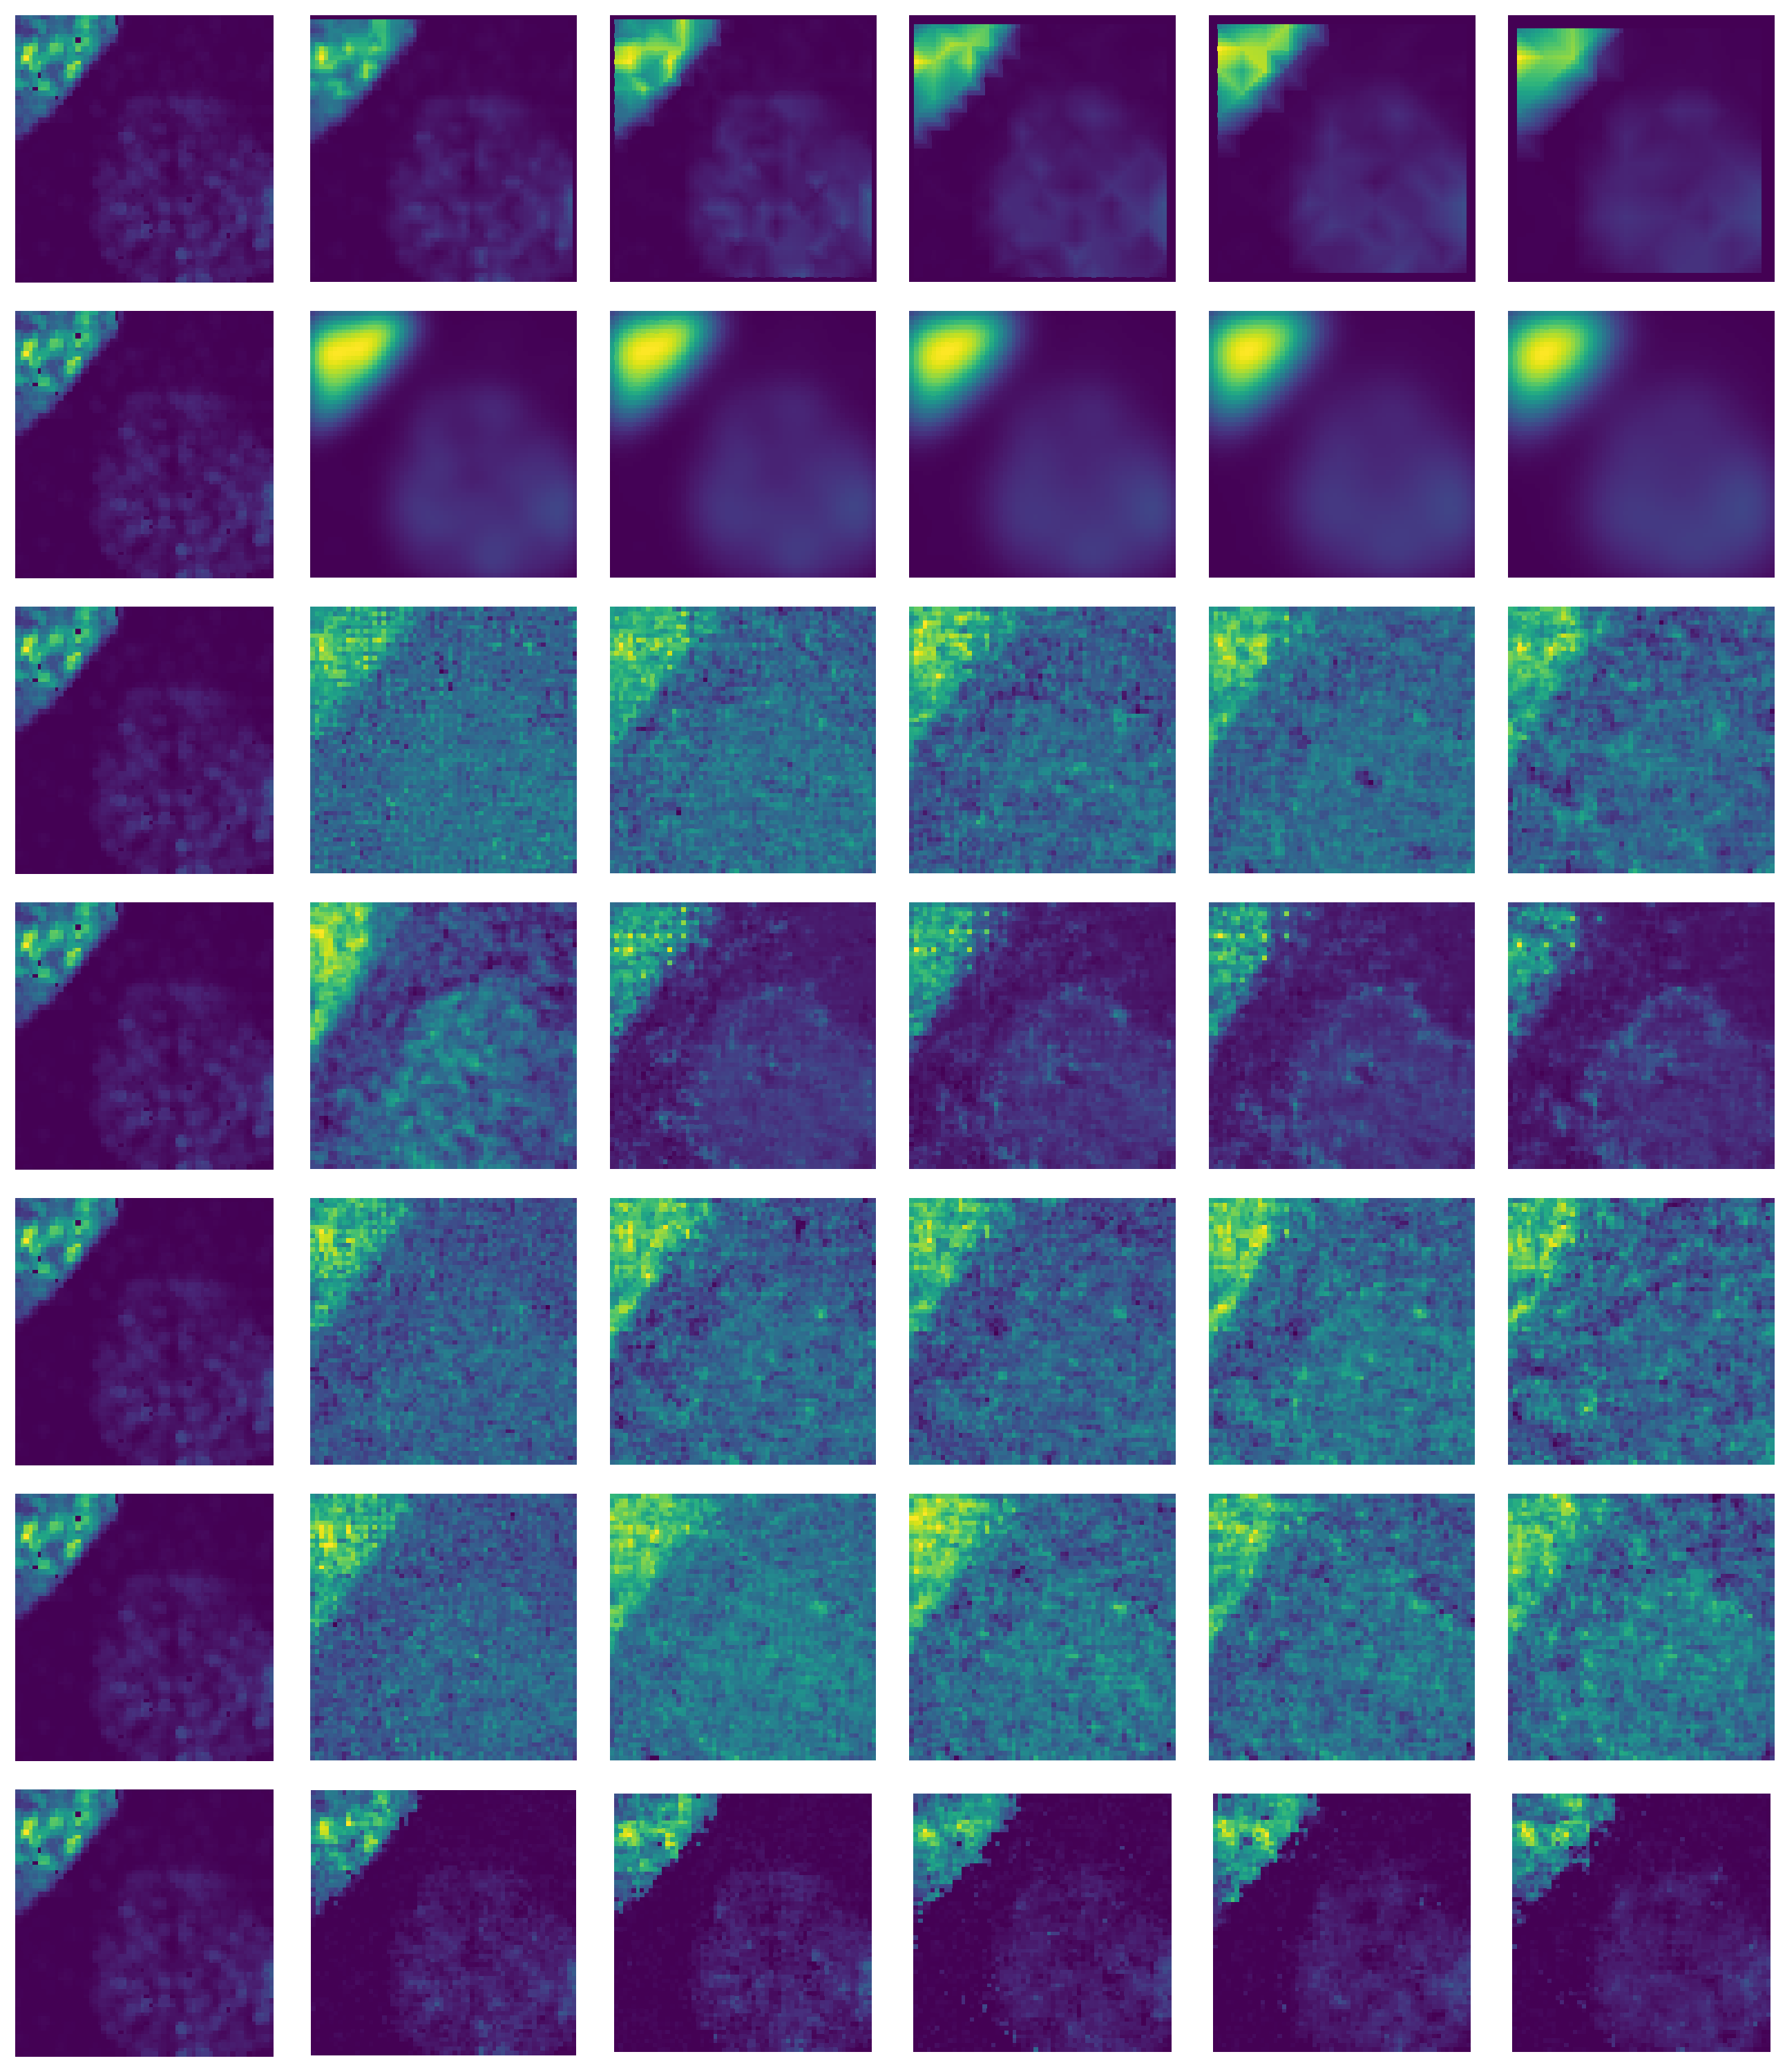

In [9]:
f, axs = plt.subplots(nrows=7, ncols=6, figsize=(36, 42))

data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

plt.axis("equal")
for i in range(len(data_name)):
    axs[i, 0].scatter(row, col, s=size_, marker='s', c=min_max_norm_t(data[genes[2]].values), cmap=cmp)
    plt.tight_layout()
    axs[i, 0].axis('off')

plt.axis("equal")
for i in range(len(data_name)):
    name = data_name[i]
    for s in scale_series:
        project_name = f'{folder_name}/norm/RNA/x{s}'
        position_r = pd.read_csv(f'result/{folder_name}/x{s}/reordered_position_with_center.csv')
        row_r = position_r['col']
        col_r = position_r['row']
        data_ours = pd.read_csv(f'result/{project_name}/{name}.csv')
        position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
        axs[i, s-1].axis("equal")
        axs[i, s-1].scatter(row_r, col_r, s=size_, marker='s', 
                         c=min_max_norm_t(data_ours[genes[2]].values), cmap=cmp, linewidth=0)
        plt.tight_layout()
        axs[i, s-1].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/supp/{genes[2]}.png')
plt.show()

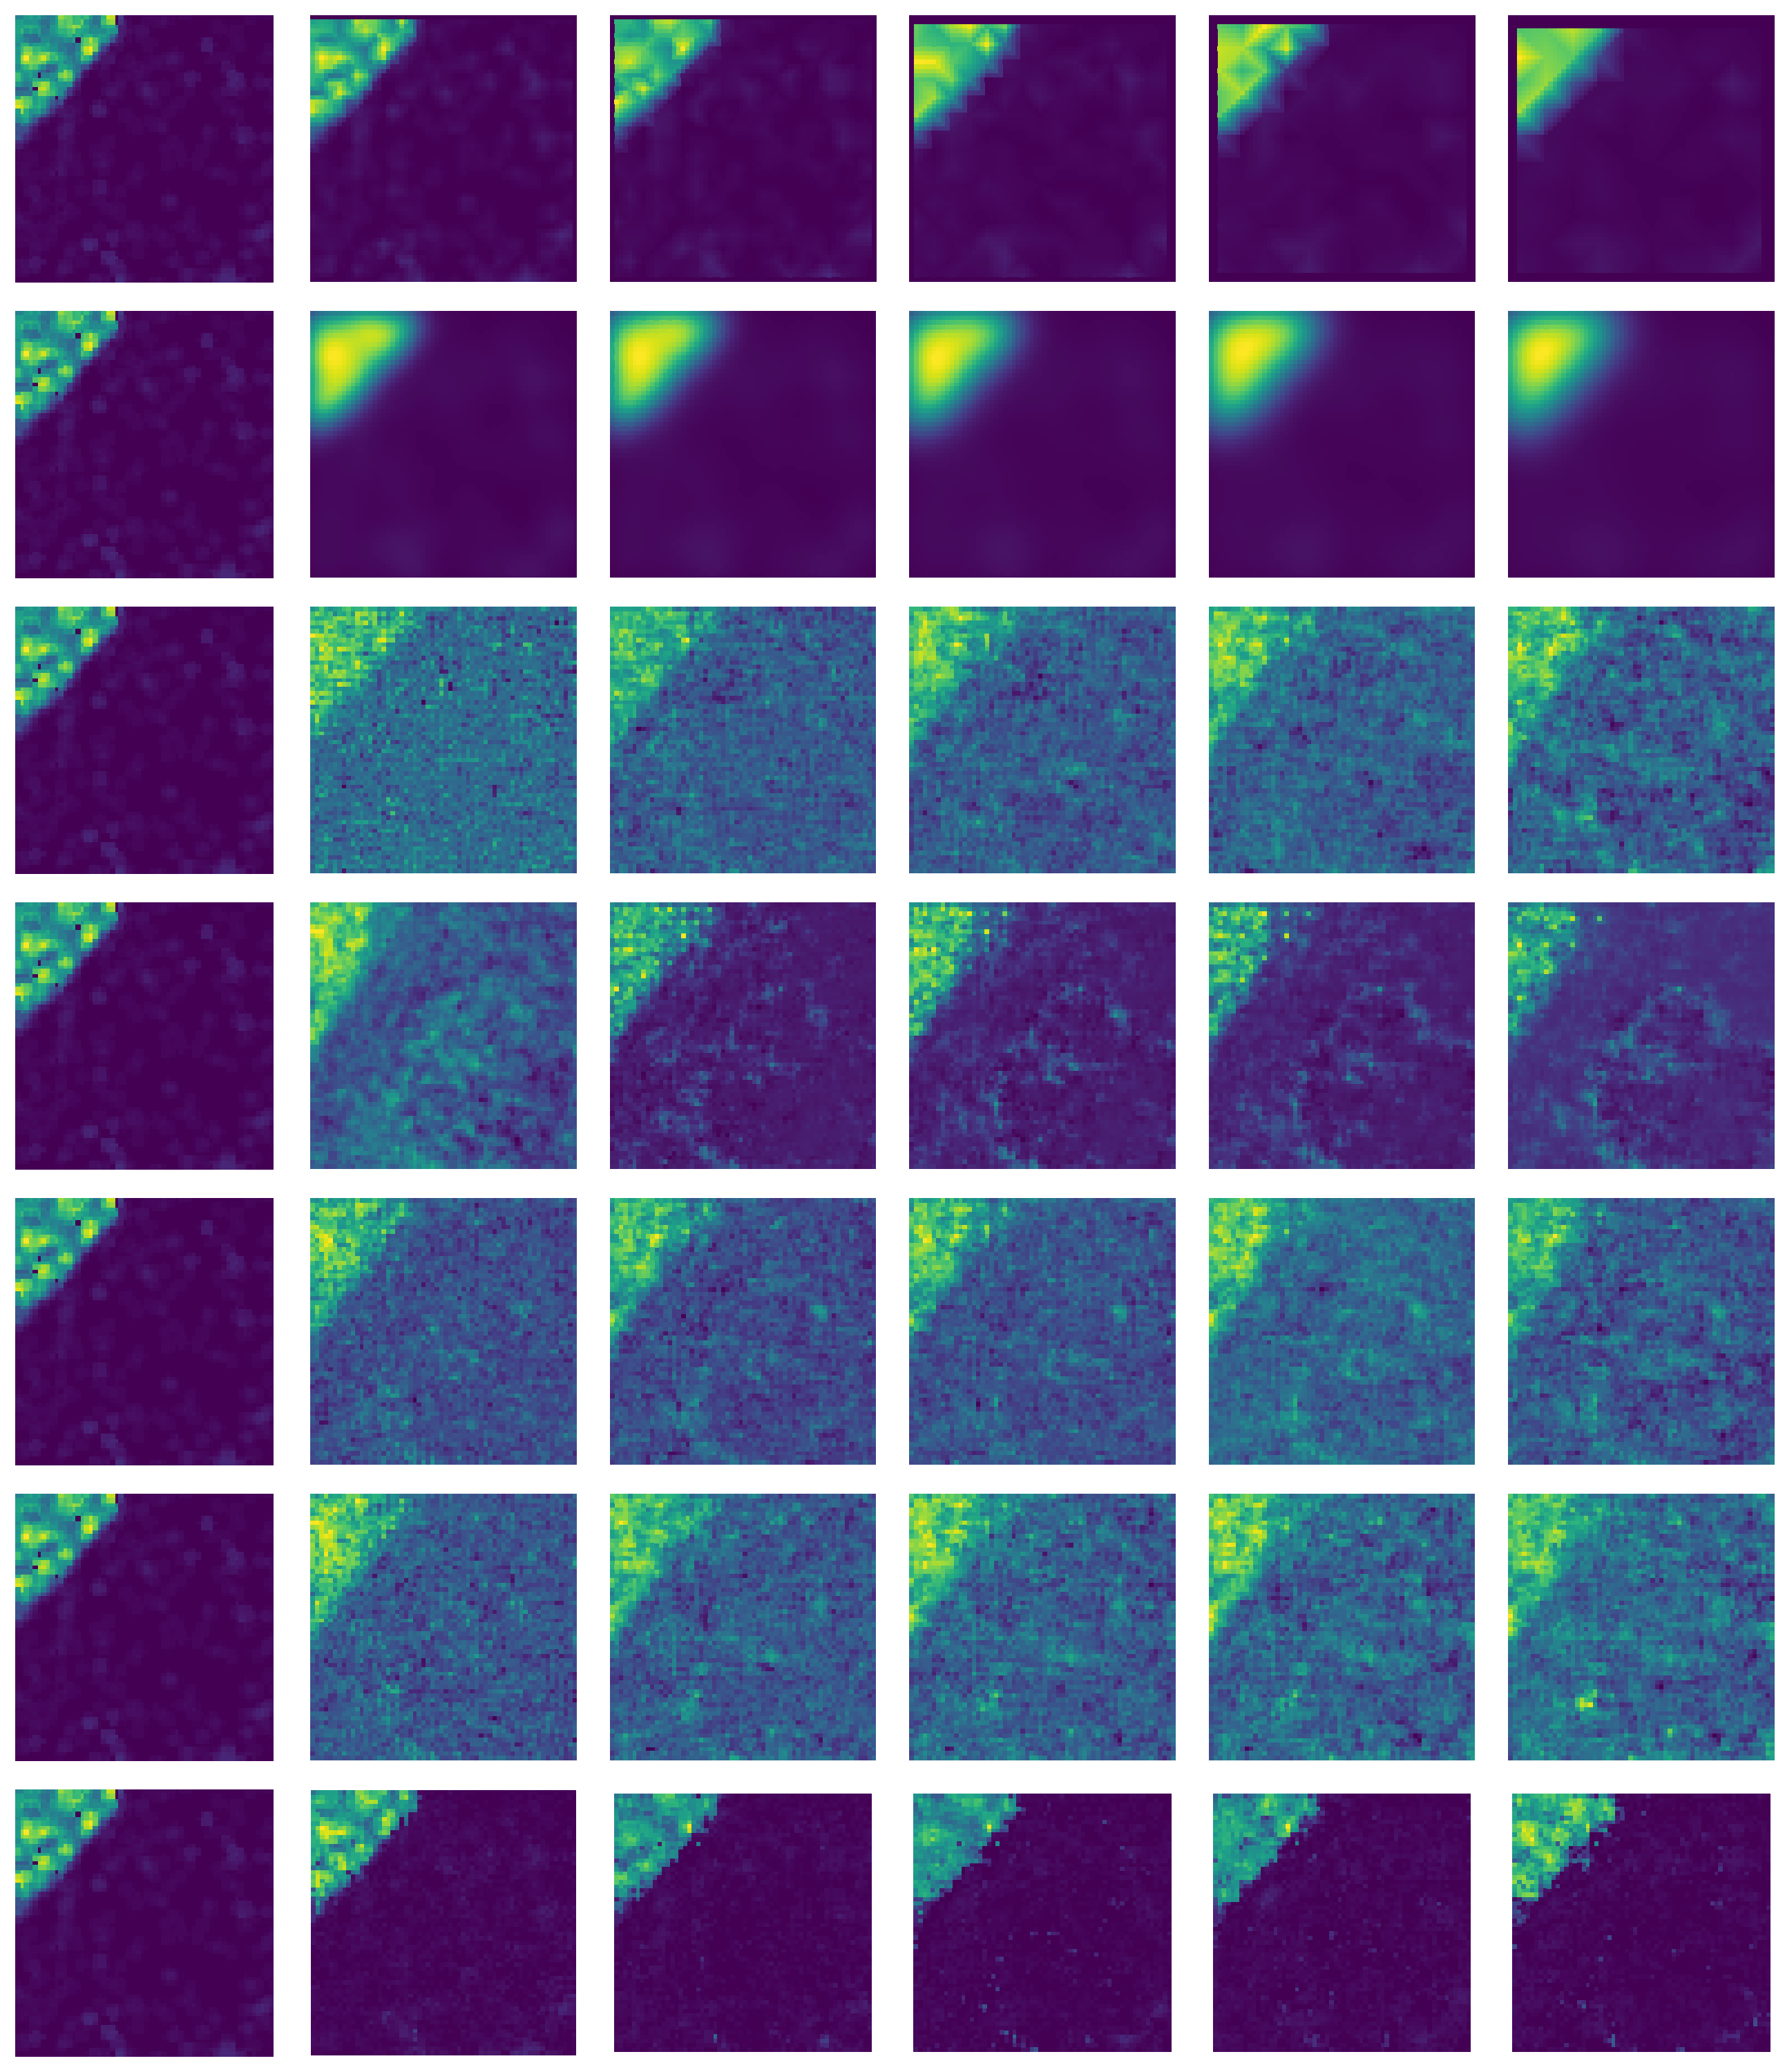

In [10]:
f, axs = plt.subplots(nrows=len(data_name), ncols=6, figsize=(36, 42))

data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

plt.axis("equal")
for i in range(len(data_name)):
    axs[i, 0].scatter(row, col, s=size_, marker='s', c=min_max_norm_t(data[genes[3]].values), cmap=cmp)
    plt.tight_layout()
    axs[i, 0].axis('off')

size_ = 49
plt.axis("equal")
for i in range(len(data_name)):
    name = data_name[i]
    for s in scale_series:
        project_name = f'{folder_name}/norm/RNA/x{s}'
        position_r = pd.read_csv(f'result/{folder_name}/x{s}/reordered_position_with_center.csv')
        row_r = position_r['col']
        col_r = position_r['row']
        data_ours = pd.read_csv(f'result/{project_name}/{name}.csv')
        position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
        axs[i, s-1].axis("equal")
        axs[i, s-1].scatter(row_r, col_r, s=size_, marker='s', 
                         c=min_max_norm_t(data_ours[genes[3]].values), cmap=cmp, linewidth=0)
        plt.tight_layout()
        axs[i, s-1].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/supp/{genes[3]}.png')
plt.show()

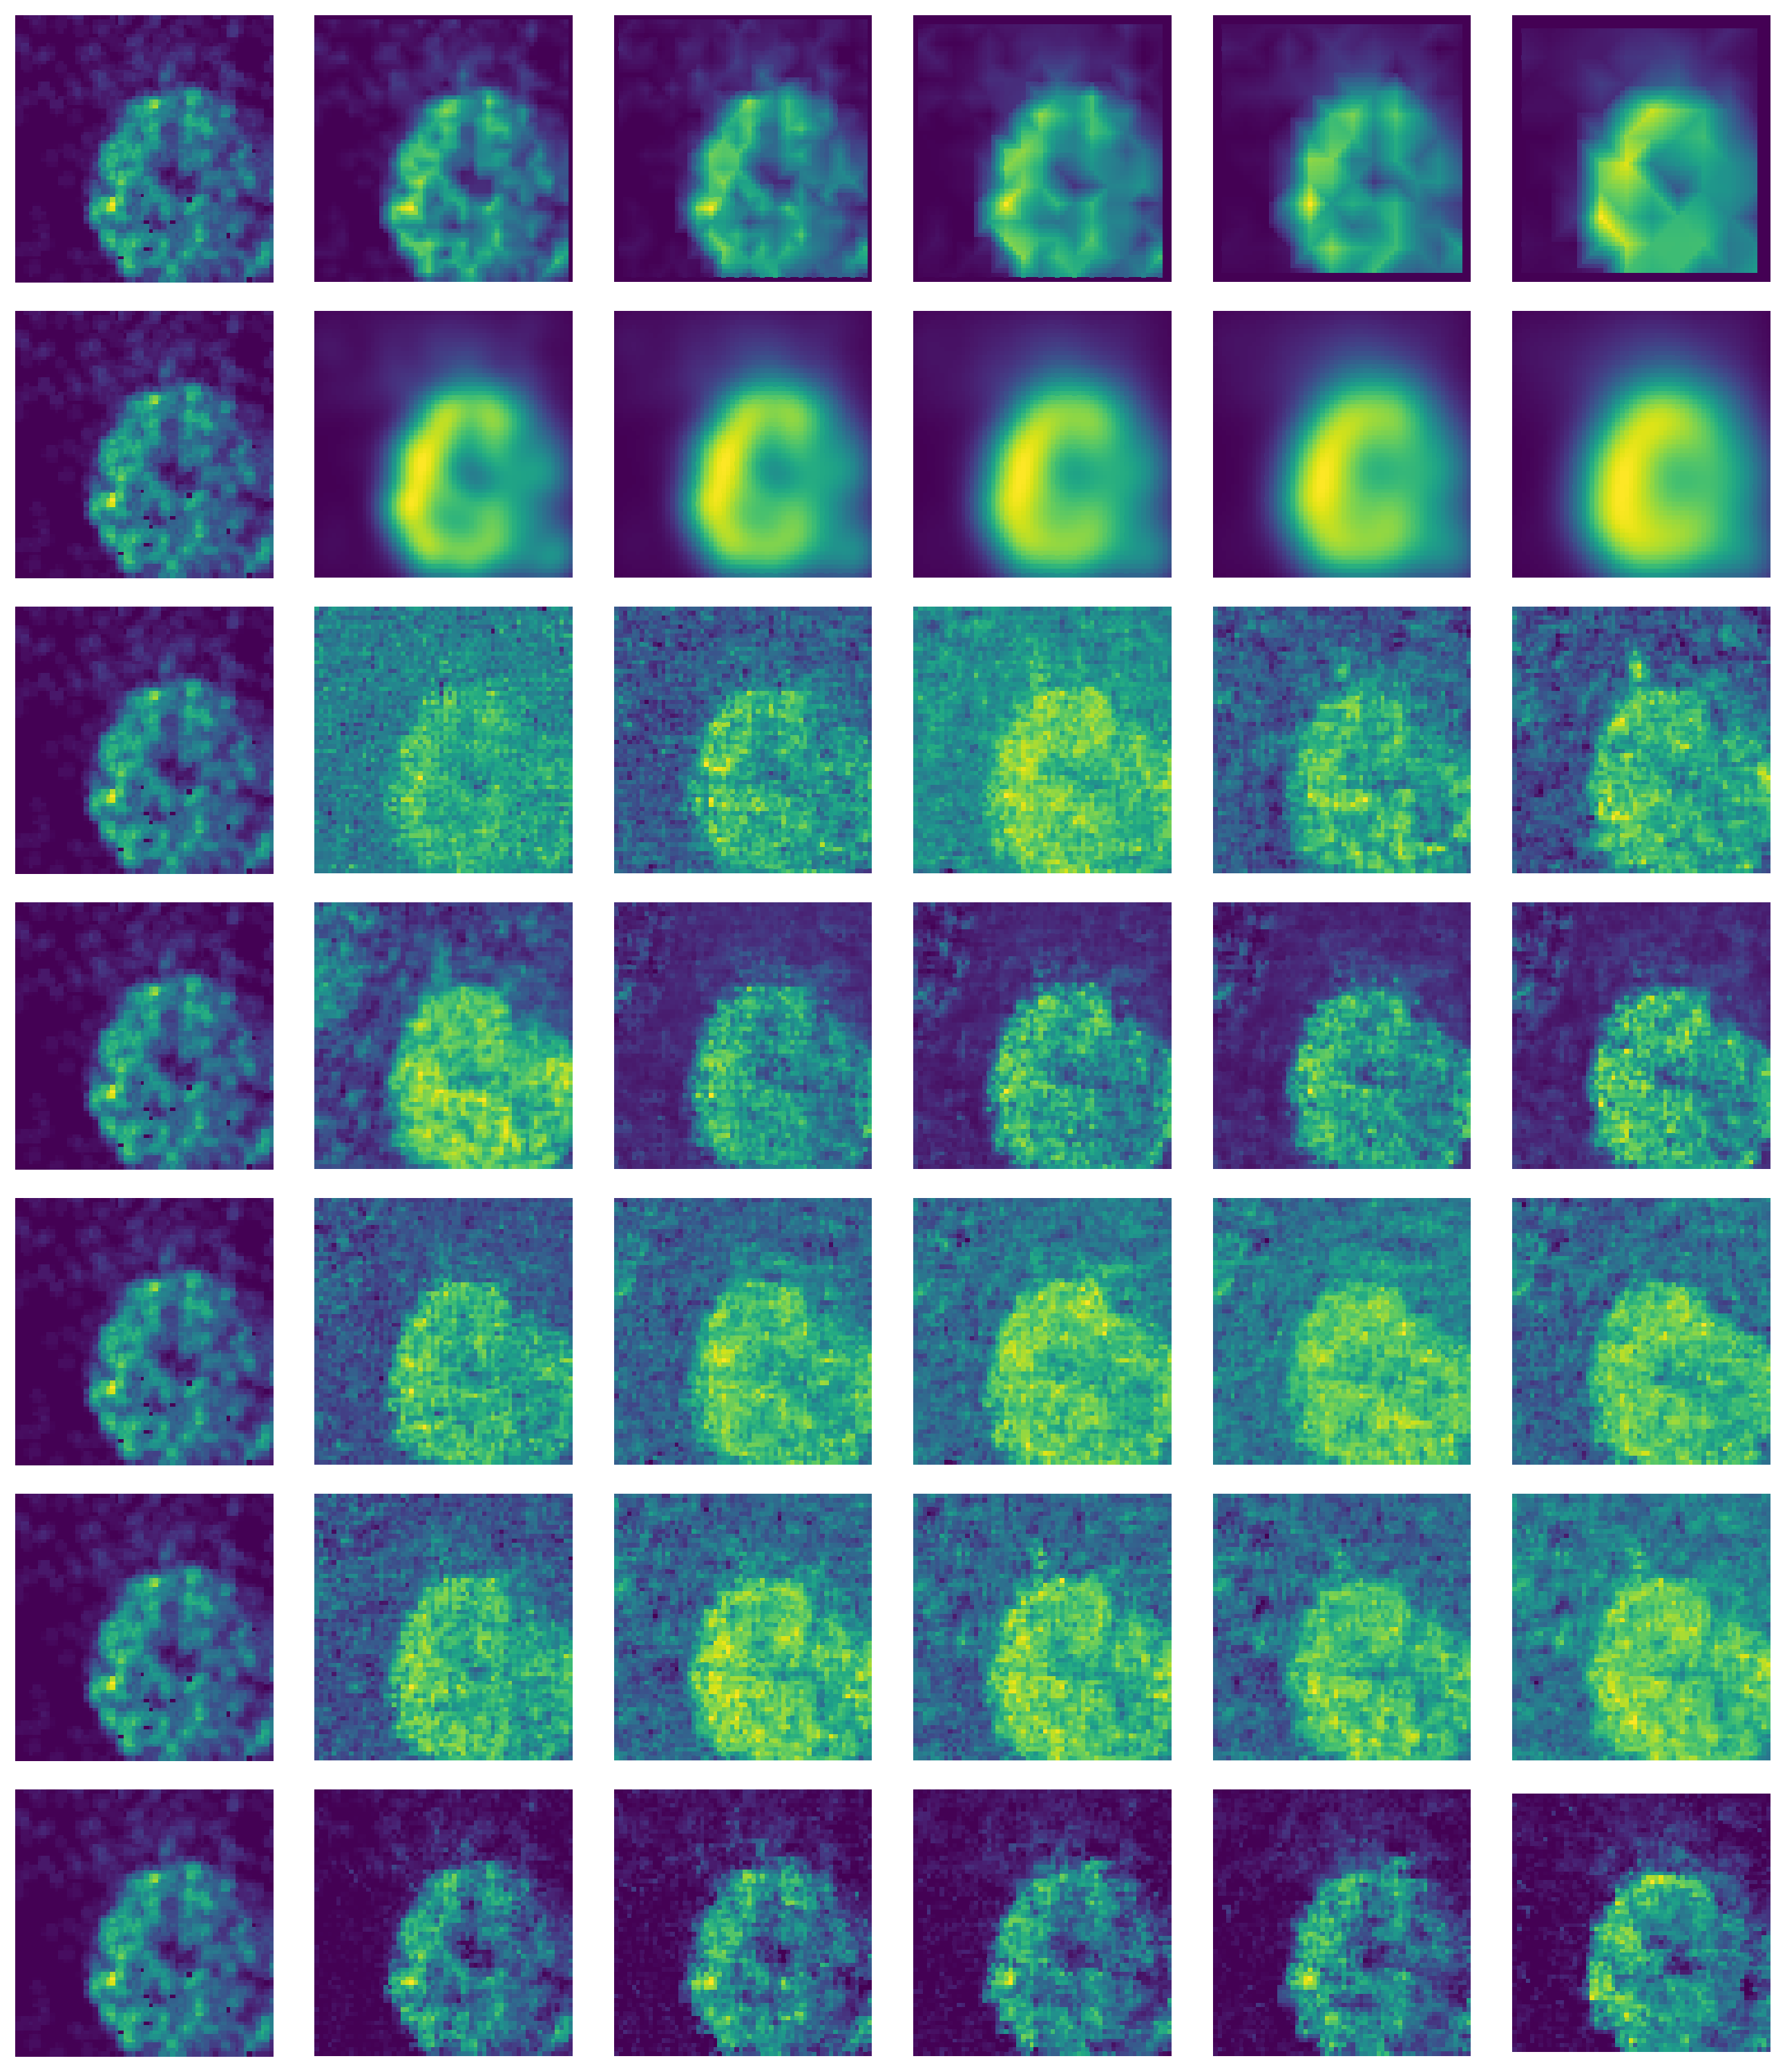

In [11]:
f, axs = plt.subplots(nrows=len(data_name), ncols=6, figsize=(36, 42))

data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

plt.axis("equal")
for i in range(len(data_name)):
    axs[i, 0].scatter(row, col, s=size_, marker='s', c=min_max_norm_t(data[genes[4]].values), cmap=cmp)
    plt.tight_layout()
    axs[i, 0].axis('off')

size_ = 49
plt.axis("equal")
for i in range(len(data_name)):
    name = data_name[i]
    for s in scale_series:
        project_name = f'{folder_name}/norm/RNA/x{s}'
        position_r = pd.read_csv(f'result/{folder_name}/x{s}/reordered_position_with_center.csv')
        row_r = position_r['col']
        col_r = position_r['row']
        data_ours = pd.read_csv(f'result/{project_name}/{name}.csv')
        position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
        plt.axis("equal")
        axs[i, s-1].scatter(row_r, col_r, s=size_, marker='s', 
                         c=min_max_norm_t(data_ours[genes[4]].values), cmap=cmp, linewidth=0)
        plt.tight_layout()
        axs[i, s-1].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/supp/{genes[4]}.png')
plt.show()

# Supp Fig 7d |  Evaluation of recovery accuracy

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, fowlkes_mallows_score
from sklearn.metrics import normalized_mutual_info_score as nmi
from scipy.stats import wasserstein_distance as WD
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from Normalization import exponential, get_size_factor
  

In [13]:
genes = genes[2:]
pearson_ = {}
for name in data_name:
    print(name)
    pearson_[name] = {}
    for g in genes:
        pearson_[name][g] = []
        for s in scale_series:
            data = pd.read_csv(f'result/{folder_name}/x{s}/reordered_count.csv')
            project_name = f'{folder_name}/norm/RNA/x{s}'
            data_compare = pd.read_csv(f'result/{project_name}/{name}.csv')

            pearson, _ = pearsonr(data[g], data_compare[g])
            pearson_[name][g].append(pearson)

interpolation_linear
gp_4
g2p_lrm
g2p_gp
g2p_mlp_128
joint_mlp_128
ours


In [14]:
data_ = {
    'scale':[2, 3, 4, 5, 6] * len(data_name) * 3,
    'value':[],
    'method':[],
    'gene': []
}

for name in data_name:
    for g in genes:
        data_['value'] += pearson_[name][g]
        data_['method'] += [name] * len(pearson_[name][g])
        data_['gene'] += [g] * len(pearson_[name][g])

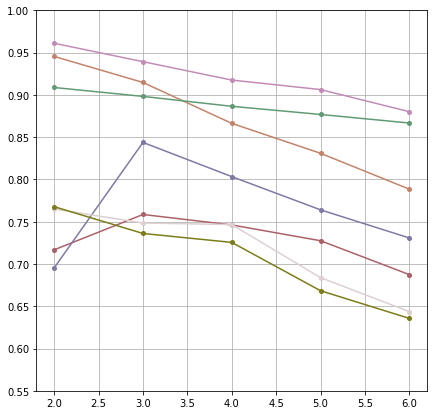

In [17]:
data_mean  = {
    'scale':[2, 3, 4, 5, 6] * len(data_name),
    'method':[],
    'value':[],
}

# RGB for original [91, 117, 157]
# RGB for metoods
color_list = [[194, 131, 105],
             [96, 154, 116], [171, 96, 103],
             [126, 120, 164], [220, 208, 209], [123, 123, 23],
             [194, 139, 182]]
color_x = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list]

for name in data_name:
    data_mean['value'] += (1/3 * (np.array(pearson_[name][genes[0]])
                            + np.array(pearson_[name][genes[1]])
                            + np.array(pearson_[name][genes[2]]))).tolist()
    data_mean['method'] += [name] * len(pearson_[name][genes[2]])

f, ax = plt.subplots(figsize=(7, 7))
for i in range(len(data_name)):
    x = data_mean['scale'][i*5:i*5+5]
    y = data_mean['value'][i*5:i*5+5]
    ax.plot(x, y, 'o', ls='-', ms=4, color=color_x[i])
ax.set(ylim=(0.55, 1))
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/supp/pearson.pdf')
plt.show()

interpolation_linear
gp_4
g2p_lrm
g2p_gp
g2p_mlp_128
joint_mlp_128
ours


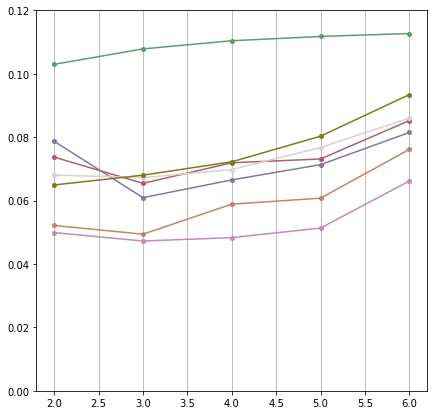

In [18]:
from sklearn.metrics import mean_squared_error as mse

def linear_normalize(array):
    array_n = array.copy()
    for i in range(array.shape[-1]):
        min_ = np.min(array[:, i])
        max_ = np.max(array[:, i])
        array_n[:, i] = (array[:, i] - min_) / (max_ - min_)
    return array_n


def linear_normalize_df(dataframe):
    """
    f: M -> M/normalize
    Args:
        dataframe: a pandas DataFrame, count matrix with dim of [cell, gene]
    Returns: linear normalized matrix
    """
    keys = dataframe.keys()
    array = dataframe.values
    new_array = linear_normalize(array)
    new_dataframe = pd.DataFrame(new_array, columns=keys)
    return new_dataframe


mse_ = {}
for name in data_name:
    print(name)
    mse_[name] = []
    for s in scale_series:
        data = pd.read_csv(f'result/{folder_name}/x{s}/reordered_count.csv')
        data_norm = linear_normalize_df(data)
        project_name = f'{folder_name}/norm/RNA/x{s}'
        data_compare = pd.read_csv(f'result/{project_name}/{name}.csv')

        mse_score = mse(data[genes].values.reshape(-1, 3),
                        data_compare[genes].values.reshape(-1, 3))
        mse_[name].append(mse_score)
            
            
data_mean['mse'] = []
for name in data_name:
    data_mean['mse'] += mse_[name]


f, ax = plt.subplots(figsize=(7, 7))
for i in range(len(data_name)):
    x = data_mean['scale'][i*5:i*5+5]
    y = data_mean['mse'][i*5:i*5+5]
    ax.plot(x, y, 'o', ls='-', ms=4, color=color_x[i])
ax.set(ylim=(0, 0.12))
ax.xaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/supp/mse.pdf')
plt.show()

In [20]:
image = data_mean['mse'][0:5]
joint = data_mean['mse'][10:15]
ours = data_mean['mse'][-5:]


for i in range(5):
    print ((ours[i]-image[i])/image[i])

-0.04324739216969558
-0.043465461308426316
-0.17944276163627784
-0.15505446309768567
-0.1313247405337687


# Supp Fig 8 | Performance evaluation on a mouse liver tumor dataset from slide-RNA-seq.

In [21]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score as ari


def map_label(original_label, my_label):
    original_label_class_num = len(np.unique(original_label))
    my_label_class_num = len(np.unique(my_label))

    c_mat = np.zeros((original_label_class_num, my_label_class_num))
    for i in range(original_label_class_num):
        for j in range(my_label_class_num):
            c_mat[i, j] = ari((original_label==i).reshape(-1), (my_label==j).reshape(-1))

    goodAt = c_mat
    weakAt = np.max(c_mat) + 1 -goodAt
    row_ind,col_ind=linear_sum_assignment(weakAt)

    class_map = {}
    for i in range(len(row_ind)):
        class_map[col_ind[i]] = row_ind[i]

    return np.array([class_map[l] for l in my_label.tolist()])

In [22]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score as ari


def map_label(original_label, my_label):
    original_label_class_num = len(np.unique(original_label))
    my_label_class_num = len(np.unique(my_label))

    c_mat = np.zeros((original_label_class_num, my_label_class_num))
    for i in range(original_label_class_num):
        for j in range(my_label_class_num):
            c_mat[i, j] = ari((original_label==i).reshape(-1), (my_label==j).reshape(-1))

    goodAt = c_mat
    weakAt = np.max(c_mat) + 1 -goodAt
    row_ind,col_ind=linear_sum_assignment(weakAt)

    class_map = {}
    for i in range(len(row_ind)):
        class_map[col_ind[i]] = row_ind[i]

    return np.array([class_map[l] for l in my_label.tolist()])

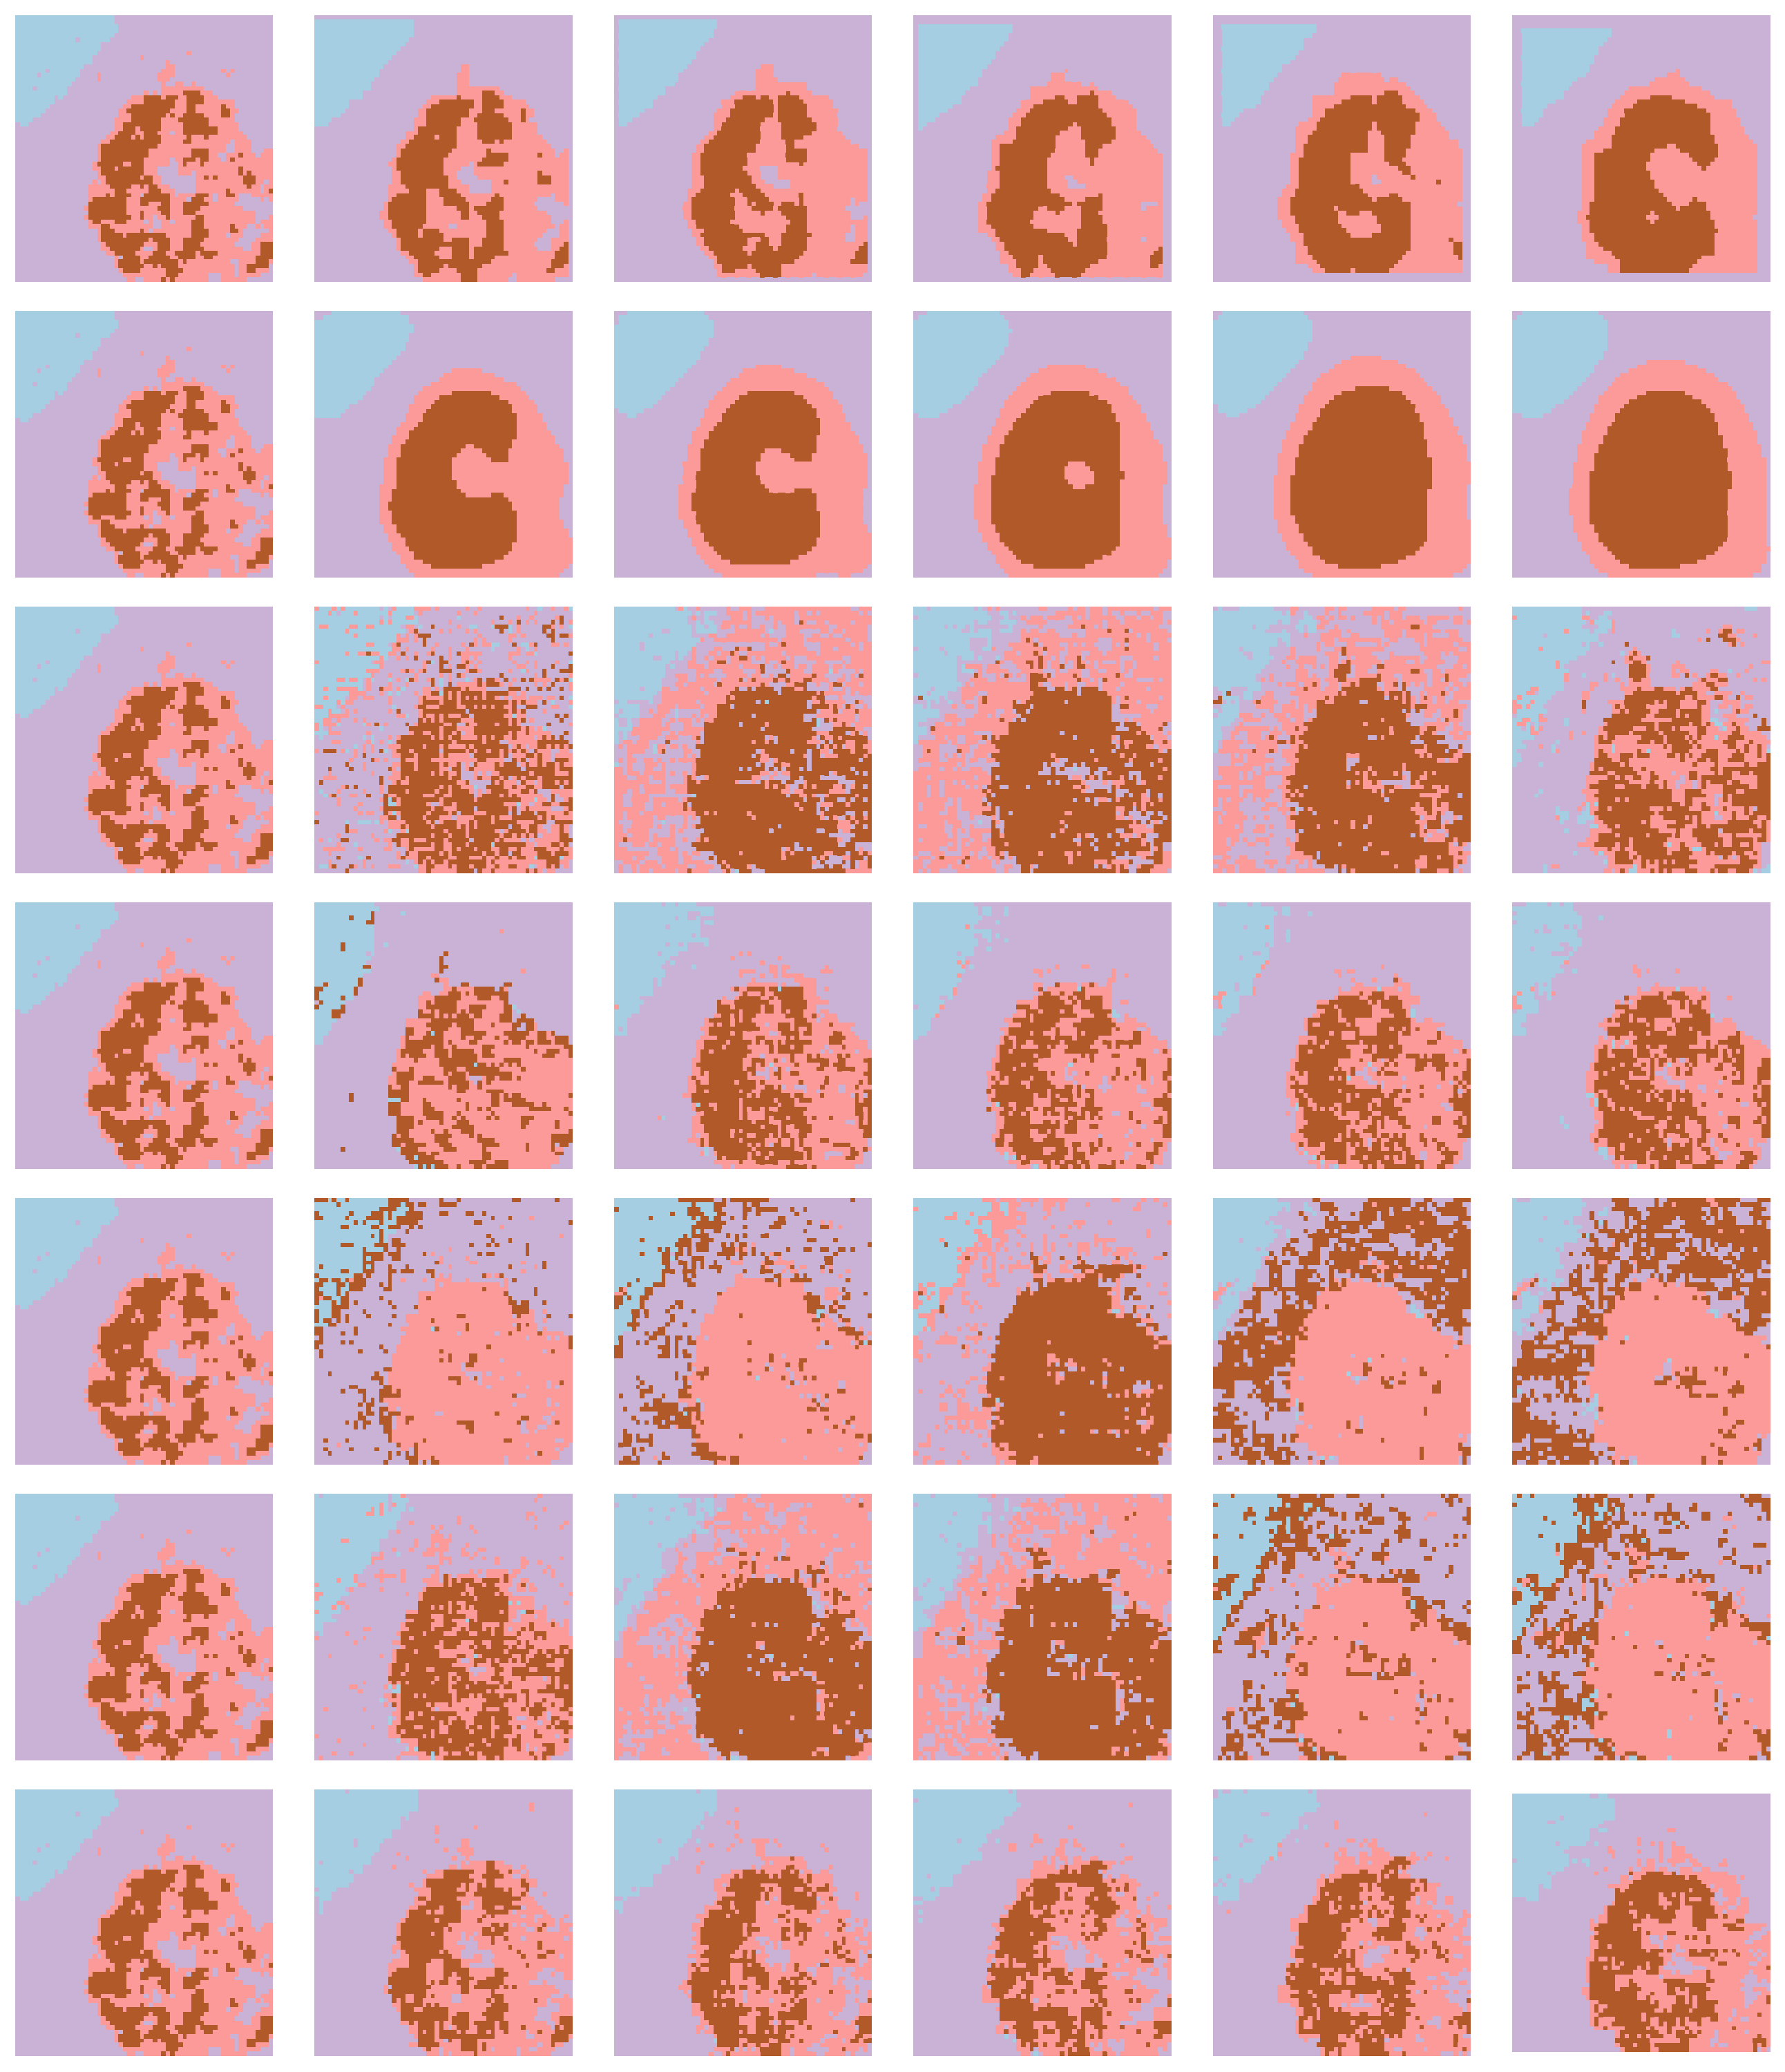

In [24]:
from sklearn.cluster import KMeans
f, axs = plt.subplots(nrows=len(data_name), ncols=6, figsize=(36, len(data_name)*6))

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
data_norm = linear_normalize_df(data)
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

plt.axis("equal")
original_label = kmeans.fit(data_norm[genes].values.reshape(-1, len(genes))).labels_
for i in range(len(data_name)):
    axs[i, 0].scatter(row, col, s=size_, marker='s', c=original_label, cmap='Paired', linewidth=0)
    plt.tight_layout()
    axs[i, 0].axis('off')

size_ = 49
plt.axis("equal")
for i in range(len(data_name)):
    name = data_name[i]
    for s in scale_series:
        project_name = f'{folder_name}/norm/RNA/x{s}'
        position_r = pd.read_csv(f'result/{folder_name}/x{s}/reordered_position_with_center.csv')
        row_r = position_r['col']
        col_r = position_r['row']
        data_ours = pd.read_csv(f'result/{project_name}/{name}.csv')
        position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
        plt.axis("equal")
        my_label = kmeans.fit(data_ours[genes].values.reshape(-1, len(genes))).labels_
        mapped_label = map_label(original_label, my_label)
        axs[i, s-1].scatter(row_r, col_r, s=size_, marker='s', 
                         c=mapped_label, cmap='Paired', linewidth=0)
        plt.tight_layout()
        axs[i, s-1].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/supp/gene_cls_4.png')
# plt.savefig(f'../paper/NNfig/Fig4/supp/gene_cls_4.pdf')
plt.show()

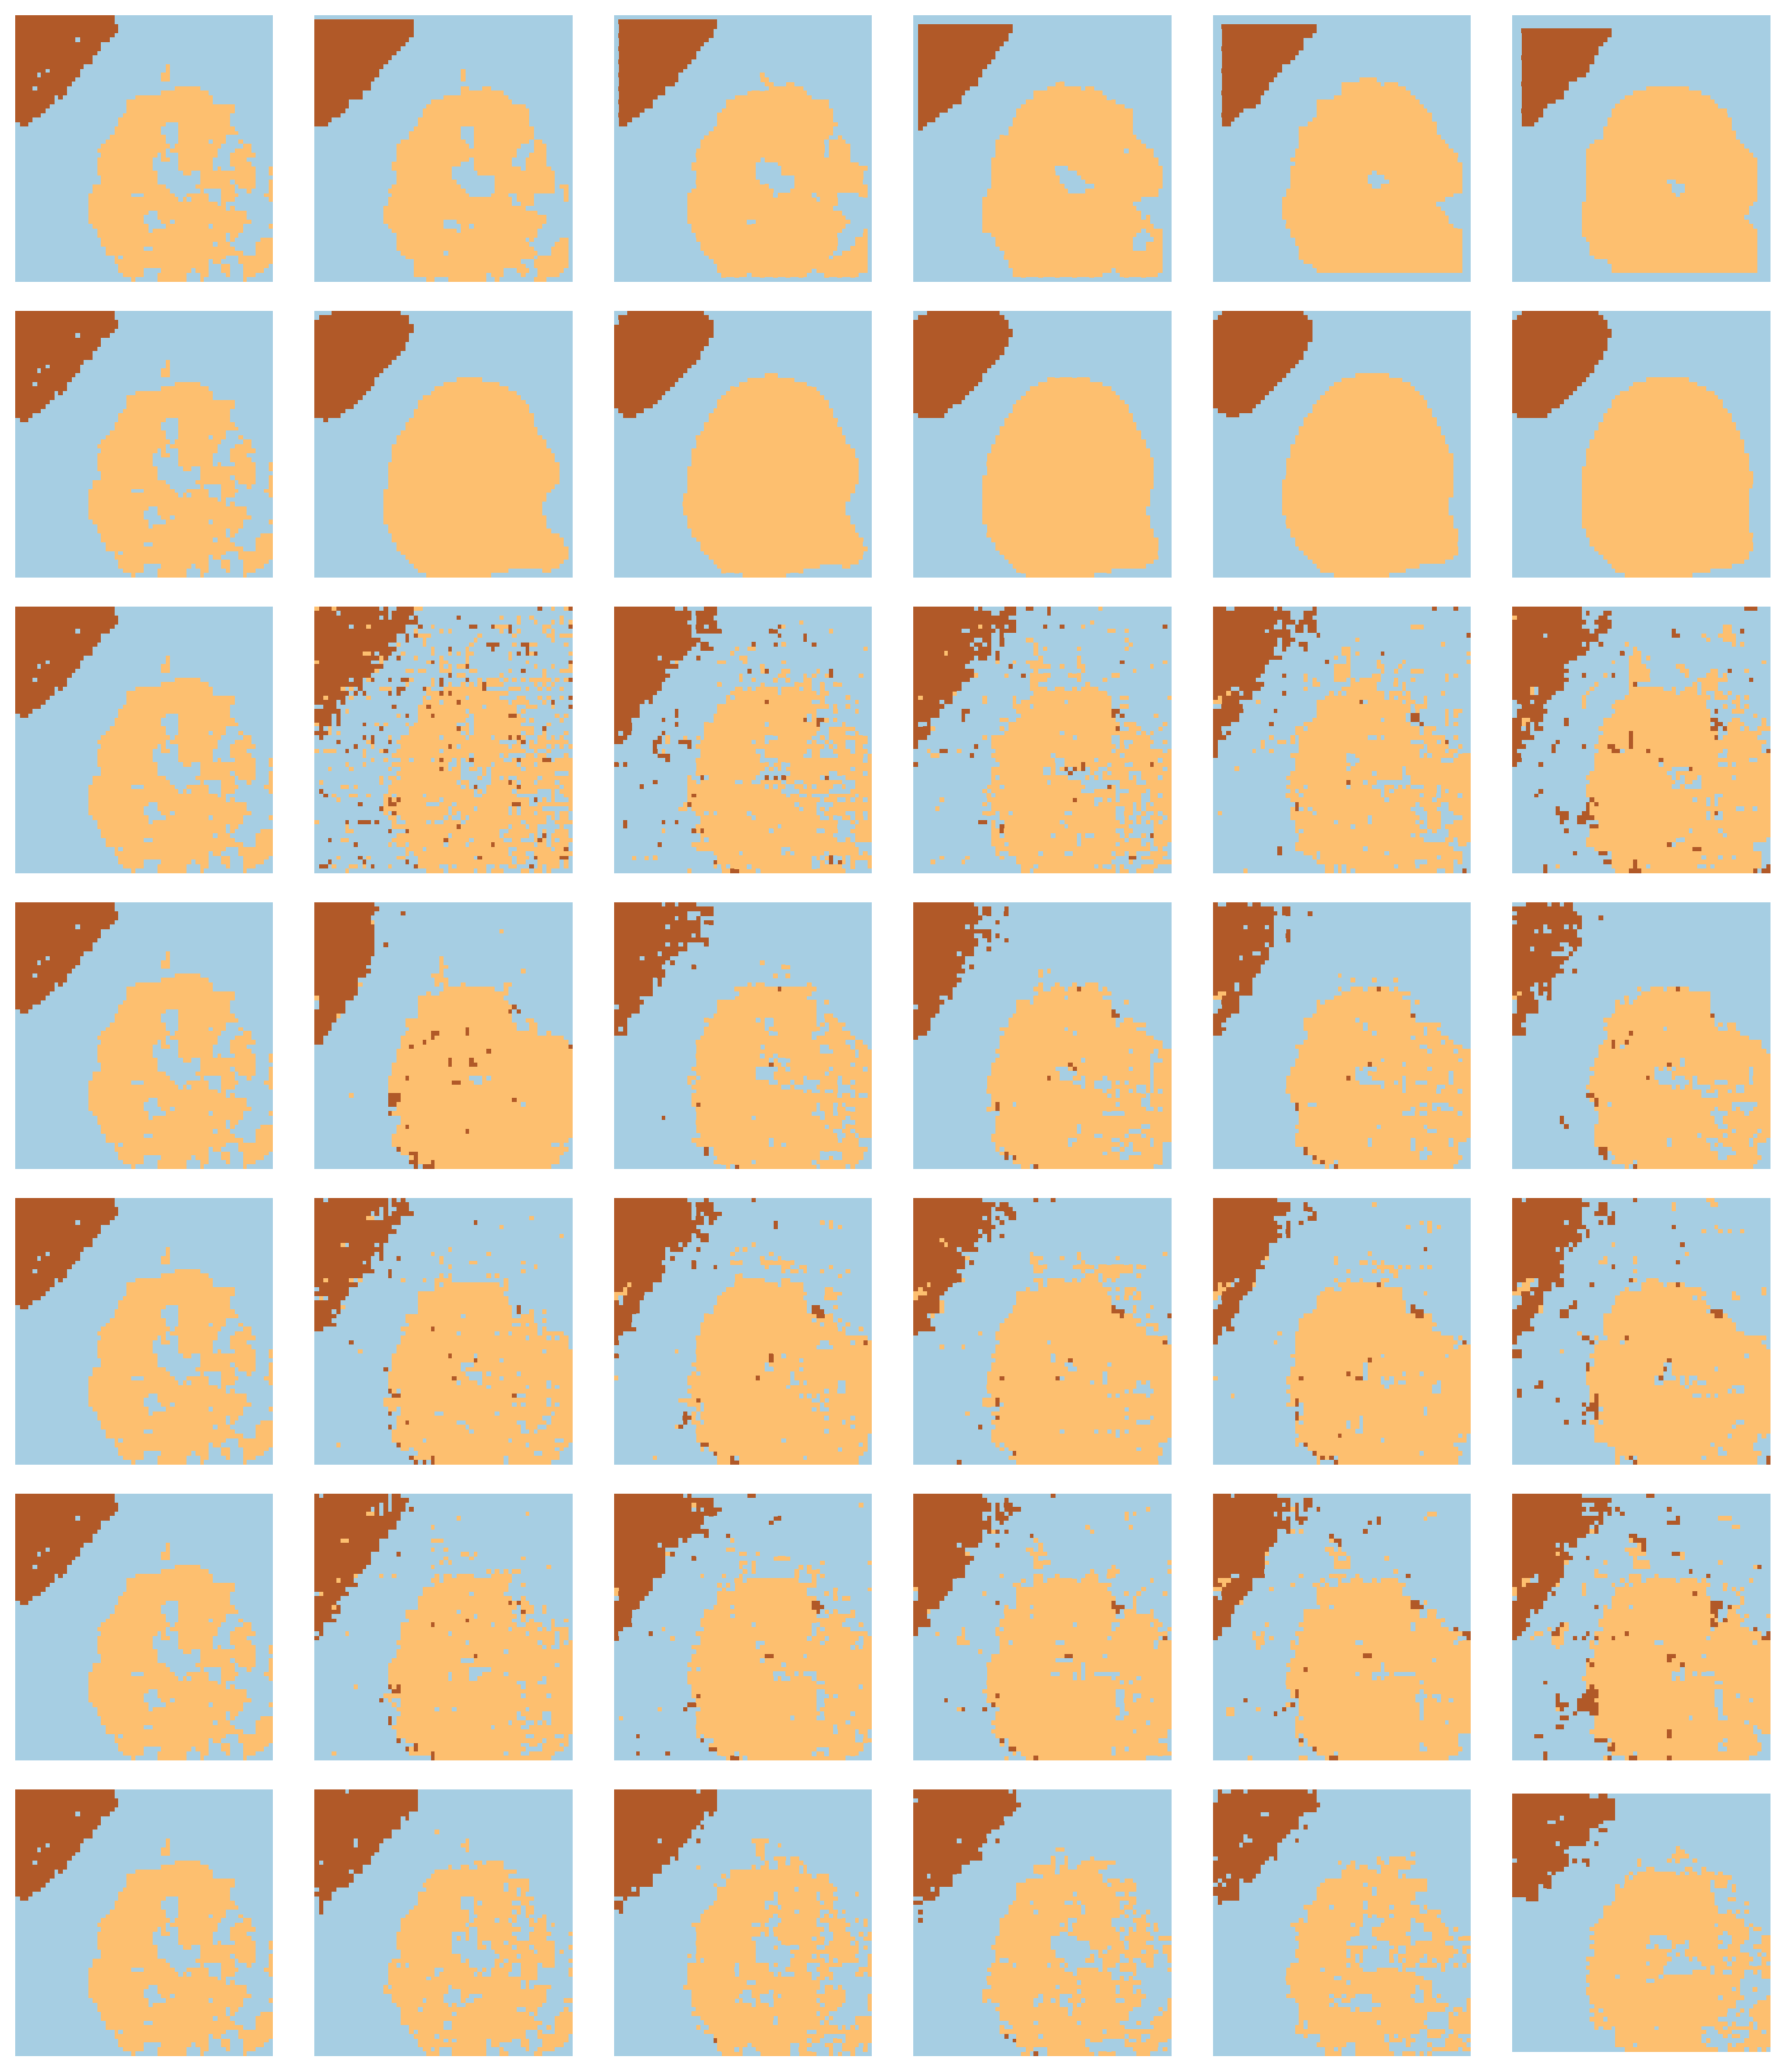

In [25]:
f, axs = plt.subplots(nrows=len(data_name), ncols=6, figsize=(36, len(data_name)*6))

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
data = pd.read_csv(f'result/{folder_name}/x2/reordered_count.csv')
data_norm = linear_normalize_df(data)
position = pd.read_csv(f'result/{folder_name}/x2/reordered_position_with_center.csv')
row = np.array(position['col'].tolist())
col = np.array(position['row'].tolist())

plt.axis("equal")
original_label = kmeans.fit(data_norm[genes].values.reshape(-1, len(genes))).labels_
for i in range(len(data_name)):
    axs[i, 0].scatter(row, col, s=size_, marker='s', c=original_label, cmap='Paired', linewidth=0)
    plt.tight_layout()
    axs[i, 0].axis('off')

size_ = 49
plt.axis("equal")
for i in range(len(data_name)):
    name = data_name[i]
    for s in scale_series:
        project_name = f'{folder_name}/norm/RNA/x{s}'
        position_r = pd.read_csv(f'result/{folder_name}/x{s}/reordered_position_with_center.csv')
        row_r = position_r['col']
        col_r = position_r['row']
        data_ours = pd.read_csv(f'result/{project_name}/{name}.csv')
        position_merge = pd.read_csv(f'result/{folder_name}/x{s}/colData_merge.csv')
        plt.axis("equal")
        my_label = kmeans.fit(data_ours[genes].values.reshape(-1, len(genes))).labels_
        mapped_label = map_label(original_label, my_label)
        axs[i, s-1].scatter(row_r, col_r, s=size_, marker='s', 
                         c=mapped_label, cmap='Paired', linewidth=0)
        plt.tight_layout()
        axs[i, s-1].axis('off')

plt.savefig(f'../paper/NNfig/Fig4/supp/gene_cls_3.png')
plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score as ari
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
ari_ = {}
for name in data_name:
    print(name)
    ari_[name] = []
    for s in scale_series:
        data = pd.read_csv(f'result/{folder_name}/x{s}/reordered_count.csv')
        data_norm = linear_normalize_df(data)
        project_name = f'{folder_name}/norm/RNA/x{s}'
        data_compare = pd.read_csv(f'result/{project_name}/{name}.csv')

        ari_score = ari(kmeans.fit(data_norm[genes].values.reshape(-1, len(genes))).labels_,
                              kmeans.fit(data_compare[genes].values.reshape(-1, len(genes))).labels_)
        print(s, ari_score)
        ari_[name].append(ari_score)

            
data_mean['ari_3'] = []
for name in data_name:
    data_mean['ari_3'] += ari_[name]

interpolation_linear
2 0.7854330721205497
3 0.7309140792044906
4 0.6454653096270377
5 0.5908132148965719
6 0.5554064313201075
gp_4
2 0.6334000253093691
3 0.616308783210718
4 0.5945113712062184
5 0.5805360025366759
6 0.5666605299629254
g2p_lrm
2 0.4252995052061033
3 0.5058451847220438
4 0.4776685995403226
5 0.47827376585222536
6 0.4221094481864293
g2p_gp
2 0.48661116383193975
3 0.5738271574493445
4 0.5187185527109427
5 0.4850906347780119
6 0.4688211438299799
g2p_mlp_128
2 0.51202025727115
3 0.5090273781053731
4 0.5058355887068656
5 0.4918356978276595
6 0.4539590613229428
joint_mlp_128
2 0.5341955653878268
3 0.5019789197987098
4 0.48582735760395185
5 0.47005794373835846
6 0.4373469695068936
ours
2 0.789177844325482
3 0.7130273659650209
4 0.678189365966752
5 0.6375665710583848
6 0.6152131131716675


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score as ari
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
ari_ = {}
for name in data_name:
    print(name)
    ari_[name] = []
    for s in scale_series:
        data = pd.read_csv(f'result/{folder_name}/x{s}/reordered_count.csv')
        data_norm = linear_normalize_df(data)
        project_name = f'{folder_name}/norm/RNA/x{s}'
        data_compare = pd.read_csv(f'result/{project_name}/{name}.csv')

        ari_score = ari(kmeans.fit(data_norm[genes].values.reshape(-1, len(genes))).labels_,
                              kmeans.fit(data_compare[genes].values.reshape(-1, len(genes))).labels_)
        print(s, ari_score)
        ari_[name].append(ari_score)

            
data_mean['ari_4'] = []
for name in data_name:
    data_mean['ari_4'] += ari_[name]

interpolation_linear
2 0.7531081134061552
3 0.7073792473030724
4 0.6136505185949747
5 0.5472308511952636
6 0.5052226042646291
gp_4
2 0.5761017445563756
3 0.5441008156274064
4 0.5056227911456093
5 0.4604262452995789
6 0.4412655931390062
g2p_lrm
2 0.3320968240652906
3 0.31979287601446843
4 0.32552547621322336
5 0.2821058514313397
6 0.41358417868803815
g2p_gp
2 0.4999670533220466
3 0.5731900387594361
4 0.5275390183451247
5 0.5118565882500093
6 0.48974613002893064
g2p_mlp_128
2 0.4442721622992267
3 0.4133656467617086
4 0.38683735767853616
5 0.31464667847835714
6 0.30003110671985256
joint_mlp_128
2 0.49724174991782094
3 0.35581255974209347
4 0.3385487388057085
5 0.3541074847575553
6 0.3090697033184134
ours
2 0.7517628198549601
3 0.6829842517879378
4 0.6466530767148447
5 0.5987597579012035
6 0.5806654820855672


In [28]:
data_ari_all = {}
data_ari_all['scale'] = data_mean['scale'] +  [i+5 for i in data_mean['scale']]
data_ari_all['ari'] = data_mean['ari_3'] + data_mean['ari_4']
data_ari_all['method'] = data_mean['method']*2

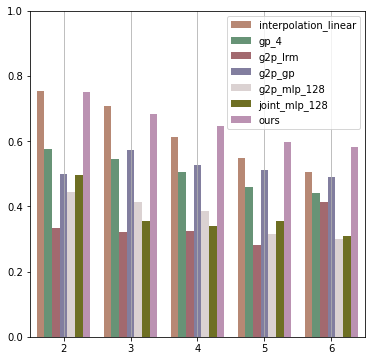

In [30]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x="scale", y="ari_4", data=data_mean, hue='method',
            palette=color_x)
ax.set(ylim=(0, 1))
ax.xaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/supp/ari_bar_4.pdf')
plt.show()

In [33]:
spatial = data_mean['ari_4'][0:5]
ours = data_mean['ari_4'][-5:]

for i in [0, 4]:
    print ((ours[i]-spatial[i])/spatial[i])

-0.0017863219466733406
0.14932601428383868


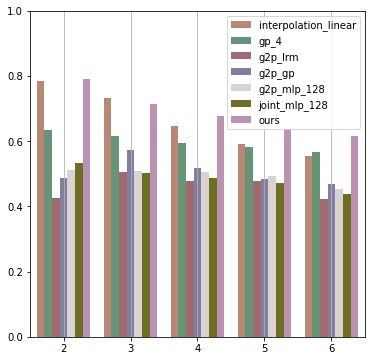

In [31]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x="scale", y="ari_3", data=data_mean, hue='method',
            palette=color_x)
ax.set(ylim=(0, 1))
ax.xaxis.grid(True)
plt.savefig(f'../paper/NNfig/Fig4/supp/ari_bar_3.pdf')
plt.show()

In [35]:
spatial = data_mean['ari_3'][5:10]
ours = data_mean['ari_3'][-5:]

for i in [0, 4]:
    print ((ours[i]-spatial[i])/spatial[i])

0.24593907924147448
0.08568195708269771
